In [1]:
A = matrix([[-1, 1], [1/2, -1]])
b = vector([1, 2])
c = vector([0, 0])
P = InteractiveLPProblemStandardForm(A, b, c)
show(P)

LP problem (use 'view(...)' or '%display typeset' for details)

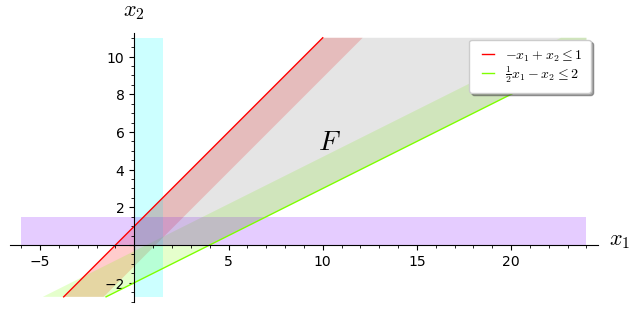

In [3]:
plot(P, xmax=24, ymax=11)

In [4]:
show(P.dictionary(1,3))

LP problem dictionary (use 'view(...)' or '%display typeset' for details)

In [13]:
from itertools import combinations

def zbiory_bazowe_dopuszczalne(A, b):
    """Dany problem w postaci równościowej: Ax = b, x >= 0."""
    
    n = A.ncols()  # wymiar przestrzeni
    m = A.nrows()  # liczba równań

    bazowe_dopuszczalne = []
    
    for Base in combinations(range(n), m):
        AB = A.matrix_from_columns(Base)
        if AB.det() != 0:
            if  all(i >= 0 for i in ~AB * b):
                bazowe_dopuszczalne.append(Base)

    return bazowe_dopuszczalne

def rozwiazanie_bazowe(A, b, Base):
    """Dany problem w postaci równościowej: Ax = b, x >= 0."""

    AB = A.matrix_from_columns(Base)
    if AB.det() == 0:
        return None
    
    n = A.ncols()  # wymiar przestrzeni

    wartosci_bazowe = ~AB * b
    rozwiazanie = [0] * n
    for i, bi in enumerate(Base):
        rozwiazanie[bi] = wartosci_bazowe[i]
    return rozwiazanie

def wierzcholki(A, b):
    """Dany problem w postaci standardowej: Ax <= b, x >= 0."""

    n = A.ncols()  # wymiar przestrzeni
    m = A.nrows()  # liczba nierówności
    A = A.augment(identity_matrix(m))  # macierz w postaci równościowej
    
    # Poniżej używamy zbioru a nie listy by usunąć duplikaty
    # Wymaga to konwersji list na krotki ("tuple"), bo elementy zbioru muszą być "immutable"
    
    return {tuple(rozwiazanie_bazowe(A, b, Base)[0: n]) for Base in zbiory_bazowe_dopuszczalne(A, b)}

In [14]:
W = wierzcholki(A, b)
W

{(0, 0), (0, 1), (4, 0)}

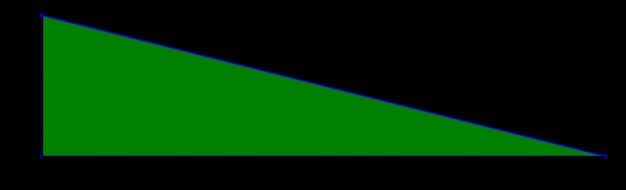

In [15]:
plot(Polyhedron(W)) # czegoś tu brakuje...

In [16]:
zbiory_bazowe_dopuszczalne(A.augment(identity_matrix(2)), b)

[(0, 2), (1, 3), (2, 3)]

In [17]:
%display typeset

P.dictionary(1, 3)

LP problem dictionary (use 'view(...)' or '%display typeset' for details)

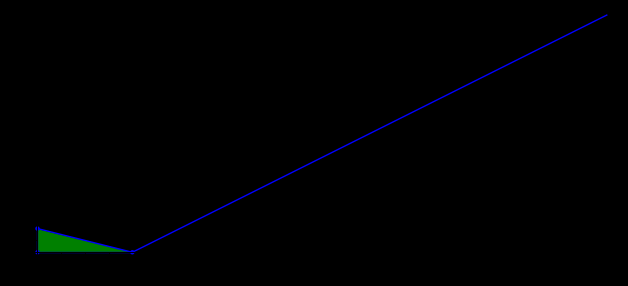

In [18]:
# Stąd mamy promień (4+2t, t)

plot(Polyhedron(W)) + plot(line([[4, 0], [24, 10]]))

In [22]:
P.dictionary(2, 4)

LP problem dictionary (use 'view(...)' or '%display typeset' for details)

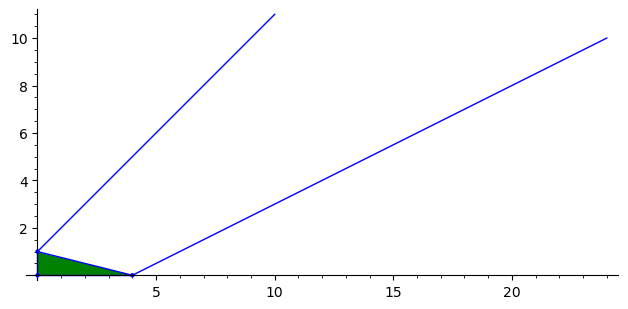

In [23]:
# Stąd mamy promień (t, 1 + t)

plot(Polyhedron(W)) + plot(line([[4, 0], [24, 10]])) + plot(line([[0, 1], [10, 11]]))

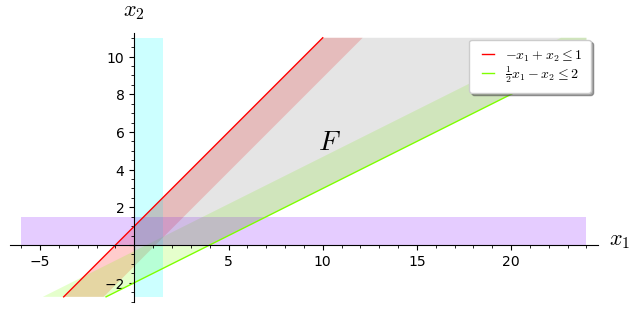

In [25]:
plot(P, xmax=24, ymax=11)